In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
import Functions

In [6]:
# Load data and standardize
raw_df = pd.read_csv("./Dataset/Clean.csv")
scaled_df = Functions.standardize(raw_df)

In [7]:
eps_dist = Functions.calculate_kn_distance(scaled_df.to_numpy(), 17)

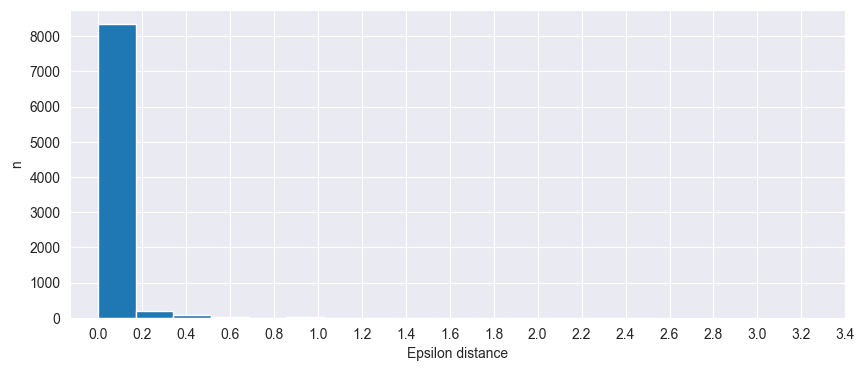

In [8]:
plt.figure(figsize=(10,4))
plt.hist(eps_dist,bins=15)
plt.ylabel('n')
plt.xlabel('Epsilon distance')
plt.xticks(np.arange(min(eps_dist), max(eps_dist)+1, 0.2))
plt.show()

In [28]:
db = DBSCAN(eps=0.3, min_samples=17).fit(scaled_df)
labels = db.labels_
number_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
label_counts = pd.Series(labels).value_counts()

print(label_counts)

-1    8243
 2     277
 0      63
 1      53
Name: count, dtype: int64


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
-1       1652.847954           0.884965  1112.977036        659.654519   
 0        982.657332           1.000000   167.729638        157.690290   
 1       1307.990899           1.000000     7.742694          7.274052   
 2        497.899038           1.000000   377.788917          5.583250   
 3         43.350617           1.000000   391.586176          1.317647   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
-1                   453.657114   1069.604260             0.521571   
 0                    10.039348      0.000000             0.127239   
 1                     0.511746    338.832423             0.008118   
 2                   372.205667      0.000000             0.984596   
 3                   391.150882      0.000000             1.0

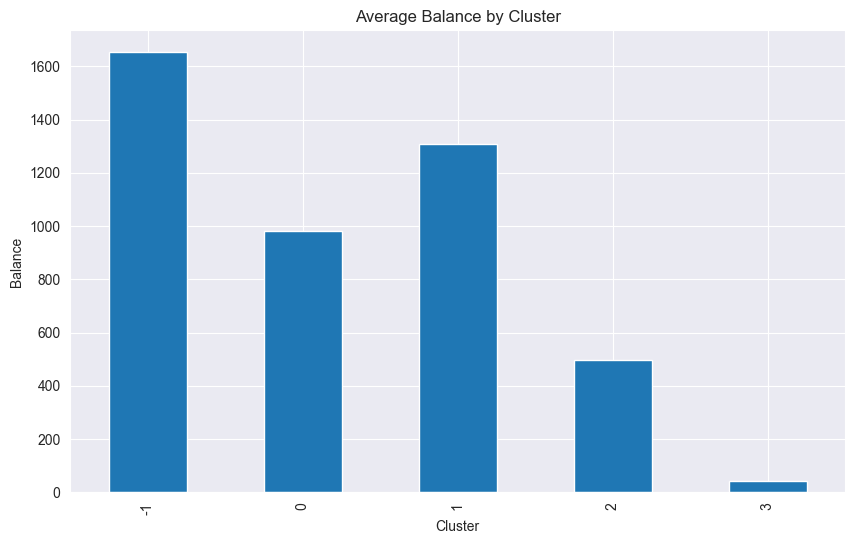

In [10]:
raw_df["Cluster"] = pd.Series(labels, index=raw_df.index)

cluster_summary = raw_df.groupby('Cluster').mean()

print(cluster_summary)

cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()

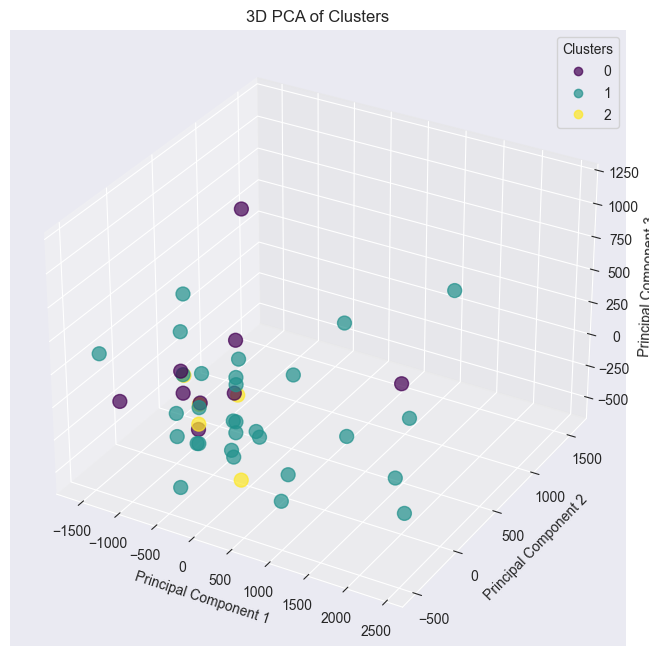

In [11]:
df = raw_df[raw_df['Cluster'] != -1].copy()
pca_df = Functions.pca(df,3)

#Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()